<a href="https://colab.research.google.com/github/sumanth4341/Habitability-score-of-Property/blob/main/Habiatability_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Habitability score of a property

## Problem Statement
Finding the correct property to live in is a crucial task while moving to a new city/location. An inappropriate property can make our life miserable. Can AI help us find better places?

## Task

You have given a relevant dataset about various properties in the USA. Your task is to identify the habitability score of the property.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score,f1_score,roc_auc_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

### Loading the Data

In [3]:
df = pd.read_csv('train.csv')

### head of Dataset

In [4]:
df.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


### Checking the Shape of data

In [5]:
df.shape

(39499, 15)

### Info about data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

### Statistical summary of Data

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Property_Area,39499.0,1391.715638,1953.287544,100.00,494.00,932.00,1770.00,28064.00
Number_of_Windows,37845.0,3.923768,2.690992,0.00,2.00,4.00,5.00,15.00
Number_of_Doors,39499.0,2.331375,1.179964,1.00,1.00,2.00,3.00,6.00
Frequency_of_Powercuts,38116.0,0.484678,0.752207,0.00,0.00,0.00,1.00,3.00
Traffic_Density_Score,39499.0,6.354772,1.219681,0.00,5.60,6.47,7.22,9.91
Air_Quality_Index,39499.0,121.352566,62.384669,0.00,95.00,113.00,140.00,1044.00
Neighborhood_Review,39499.0,3.735945,0.796843,0.00,3.22,3.85,4.26,5.00
Habitability_score,39499.0,73.482297,14.118753,7.28,69.66,75.76,82.26,100.00


### Visualizing The Correlations between numerical variables

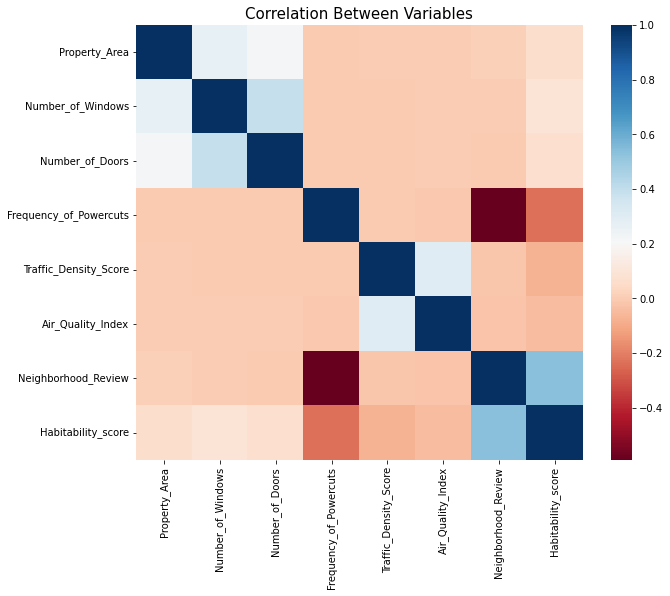

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="RdBu")
plt.title("Correlation Between Variables",size=15)
plt.show()

### Feature Selection
We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable.

In [9]:
important_num_cols = list(df.corr()['Habitability_score'][(df.corr()['Habitability_score']>0.5) | (df.corr()['Habitability_score']<-0.5)].index)

cat_cols = ['Property_Type','Furnishing','Power_Backup','Water_Supply','Crime_Rate','Dust_and_Noise']

important_cols = important_num_cols + cat_cols 

df = df[important_cols]

### Checking The Missing Values

In [10]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
Neighborhood_Review       0
Habitability_score        0
Property_Type             0
Furnishing             1042
Power_Backup              0
Water_Supply              0
Crime_Rate              787
Dust_and_Noise         1219
dtype: int64
------------------------------
TOTAL MISSING VALUES: 3048


### Visualizing the Correlation between the numerical variables using pairplot Visualization

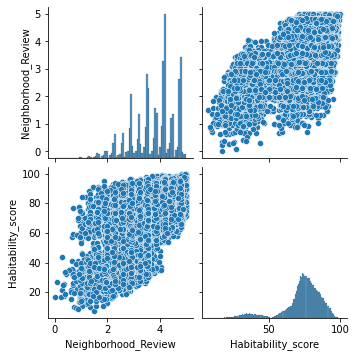

In [11]:
sns.pairplot(df[important_num_cols])

### Split The Data into X and y

In [12]:
X = df.drop('Habitability_score',axis=1)
y = df['Habitability_score']

### OneHotEncoding
Encoding the categorical features in X dataset by using One-Hot Encoding method

In [13]:
X = pd.get_dummies(X , columns=cat_cols)

### Standardizing the numerical columns in X dataset

In [14]:
important_num_cols.remove('Habitability_score')

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [15]:
X.head()

,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Furnishing_Fully Furnished,Furnishing_Semi_Furnished,Furnishing_Unfurnished,...,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Crime_Rate_Slightly above average,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Well below average,Dust_and_Noise_High,Dust_and_Noise_Low,Dust_and_Noise_Medium
0,0.155685,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,-0.233355,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
2,0.092936,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,-3.006834,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1.297705,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


### Checking the Missing Values

In [16]:
print("Missing Values by Column")
print("-"*30)
print(X.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",X.isna().sum().sum()) 

Missing Values by Column
------------------------------
Neighborhood_Review                     0
Property_Type_#R%$G&867                 0
Property_Type_Apartment                 0
Property_Type_Bungalow                  0
Property_Type_Container Home            0
Property_Type_Duplex                    0
Property_Type_Single-family home        0
Furnishing_Fully Furnished              0
Furnishing_Semi_Furnished               0
Furnishing_Unfurnished                  0
Power_Backup_NOT MENTIONED              0
Power_Backup_No                         0
Power_Backup_Yes                        0
Water_Supply_All time                   0
Water_Supply_NOT MENTIONED              0
Water_Supply_Once in a day - Evening    0
Water_Supply_Once in a day - Morning    0
Water_Supply_Once in two days           0
Crime_Rate_Slightly above average       0
Crime_Rate_Slightly below average       0
Crime_Rate_Well above average           0
Crime_Rate_Well below average           0
Dust_and_Noise_High 

### Train-Test Split the Data

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Machine Learning Models


### Evaluation Functions

In [18]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [19]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

### Linear Regression


In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 7.338084974195232
MSE: 85.31959762347334
RMSE: 9.236860810008633
R2 Score: 0.5938974397121138
------------------------------
RMSE Cross-Validation: 9.014306107026995


### Ridge Regression

In [21]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 7.337976770712956
MSE: 85.32040254117858
RMSE: 9.236904380861512
R2 Score: 0.5938936084804857
------------------------------
RMSE Cross-Validation: 9.014298355282113


### Lasso Regression

In [22]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 7.803947122517573
MSE: 112.02038054026492
RMSE: 10.583968090478397
R2 Score: 0.46680757283237495
------------------------------
RMSE Cross-Validation: 10.247160180414387


### ElasticNet Regression

In [23]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 8.238335222518206
MSE: 133.76418923972415
RMSE: 11.565646944279605
R2 Score: 0.3633118153602253
------------------------------
RMSE Cross-Validation: 11.211448565919609


### Support Vector Machines

### RandomForestRegression

In [24]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 4.951946633621312
MSE: 44.809549192430694
RMSE: 6.693993516013494
R2 Score: 0.7867163798322274
------------------------------
RMSE Cross-Validation: 6.5674545510792655


### XGBoost Regressor

In [25]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

[09:32:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 5.655523650678804
MSE: 51.95626379383796
RMSE: 7.208069352735028
R2 Score: 0.7526995867609972
------------------------------
[09:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:35:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Cross-Validation: 7.102854181674088


### Polynomial Regression

In [26]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 6.256426344936709
MSE: 59.663548936436904
RMSE: 7.724218338216295
R2 Score: 0.7160146009375632
------------------------------
RMSE Cross-Validation: 9.014306107026995


## Model Comparison

In [27]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
4,RandomForestRegressor,4.951947,44.809549,6.693994,0.786716,6.567455
5,XGBRegressor,5.655524,51.956264,7.208069,0.752700,7.102854
1,Ridge,7.337977,85.320403,9.236904,0.593894,9.014298
0,LinearRegression,7.338085,85.319598,9.236861,0.593897,9.014306
6,Polynomial Regression (degree=2),6.256426,59.663549,7.724218,0.716015,9.014306
2,Lasso,7.803947,112.020381,10.583968,0.466808,10.247160
3,ElasticNet,8.238335,133.764189,11.565647,0.363312,11.211449
